In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')

In [3]:
valid = pd.read_csv('./data/validation.csv')

In [4]:
train.shape

(2430981, 25)

## Constant Bidding

In [4]:
max(train.payprice)

300

In [5]:
min(train.payprice)

0

(array([517133., 593656., 651231., 190292., 141824., 127824.,  90231.,
         66132.,  30010.,  22648.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

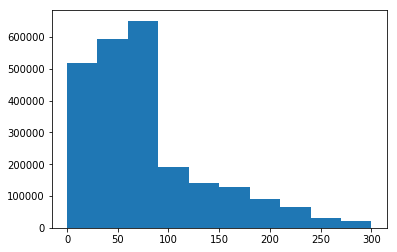

In [8]:
plt.hist(train.payprice)

In [11]:
train[train.payprice==0].iloc[0]

click                                                    0
weekday                                                  3
hour                                                    17
bidid             c3f2ee2b48e4d9752d6dffa82e2d0c8162e938bb
userid            d4c8e8401f4fecffda48a67d80a7ce605efeda7f
useragent                                       mac_safari
IP                                            121.225.93.*
region                                                  80
city                                                    80
adexchange                                               3
domain                    e96dd4d612a79976fd4155437b0be59a
url                       2ac390e11915b8157dbb29788830f002
urlid                                                 null
slotid                          QQlive_SP_dsj_bottom_Width
slotwidth                                              980
slotheight                                              90
slotvisibility                                          

In [8]:
min(train.payprice), max(train.payprice), np.mean(train.payprice)

(0, 300, 78.15141623895867)

By using an iterative searching approach, we find the optimal constant 77 and 79, which yield maximum click number 68. The general process is:
1. Choose evently spaced contant from the searching interval and compute the corresponding click number
2. Narrow down and update the seaching interval based the performance of choosen constants. The condition of using all budget is also taken into consideration when update searching interval

Firstly, the optimal constant value must be between the minimum and maximum value of payprice, which is 0 and 300 respectively. In order to find the optimal value, we choose 11 evently spaced points from the interval [0,300], and then narrow down the interval iteratively based on the performance of the chosen points.


??? Does the outcome of bidding depend on bidprice or payprice ?

In [5]:
def const_bid(df, const, train_budget=True):
    print('const = ', const)
    budget = 6250 * 1000
    num_ad = 0
    num_click = 0
    iter_pct = 1.00
    for idx, row in df.iterrows():
#         if const >= row.payprice and budget >= row.payprice:
        if const >= row.payprice and budget >= const:
            budget -= row.payprice
            num_ad += 1
            num_click += row.click
        # early stopping
        if budget < const:
            iter_pct = idx / df.shape[0]
            return num_click, num_ad, iter_pct, budget
        
    return num_click, num_ad, iter_pct, budget
        

In [6]:
def try_consts(df, linspace):
    num_clicks = []
    num_ads = []
    iter_pcts = []
    budgets = []
    # for x in np.linspace(0,300,11):
    for x in linspace:
        num_click, num_ad, iter_pct, budget = const_bid(df, x)
        num_clicks.append(num_click)
        num_ads.append(num_ad)
        iter_pcts.append(iter_pct)
        budgets.append(budget)
    
    return num_clicks, num_ads, iter_pcts, budgets
    

## First iteration on validation set

In [7]:
np.linspace(0, 300, 11)

array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.])

In [17]:
valid_linspace_1 = np.linspace(0, 300, 11)
num_clicks_1, num_ads_1, iter_pcts_1, budgets_1 = try_consts(valid, valid_linspace_1)

const =  0.0
const =  30.0
const =  60.0
const =  90.0
const =  120.0
const =  150.0
const =  180.0
const =  210.0
const =  240.0
const =  270.0
const =  300.0


In [9]:
num_clicks_1, num_ads_1, iter_pcts_1, budgets_1 = try_consts(valid, [98])
num_clicks_1

const =  98


In [10]:
num_clicks_1, num_ads_1, iter_pcts_1, budgets_1 = try_consts(valid, [98])
num_clicks_1

[63]

Text(0,0.5,'number of clicks gained')

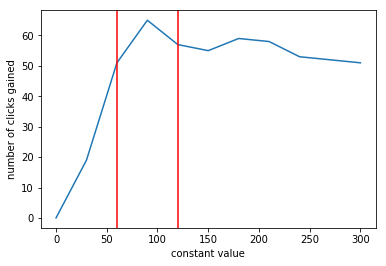

In [52]:
plt.plot(valid_linspace_1, num_clicks_1)
plt.axvline(x=valid_linspace_1[2], color='r')
plt.axvline(x=valid_linspace_1[4], color='r')
plt.xlabel('constant value')
plt.ylabel('number of clicks gained')

Text(0,0.5,'iterated percentation before termination')

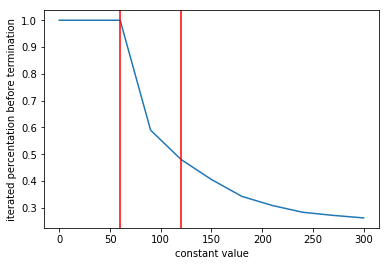

In [53]:
plt.plot(valid_linspace_1, iter_pcts_1)
plt.axvline(x=valid_linspace_1[2], color='r')
plt.axvline(x=valid_linspace_1[4], color='r')
plt.xlabel('constant value')
plt.ylabel('iterated percentation before termination')

## Second iteration

In [31]:
valid_linspace_1[2], valid_linspace_1[4]

(60.0, 120.0)

In [34]:
valid_linspace_2 = np.linspace(valid_linspace_1[2], valid_linspace_1[4], 11)

In [35]:
valid_linspace_2

array([ 60.,  66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120.])

In [36]:
num_clicks_2, num_ads_2, iter_pcts_2, budgets_2 = try_consts(valid, valid_linspace_2)

const =  60.0
const =  66.0
const =  72.0
const =  78.0
const =  84.0
const =  90.0
const =  96.0
const =  102.0
const =  108.0
const =  114.0
const =  120.0


Text(0,0.5,'number of clicks gained')

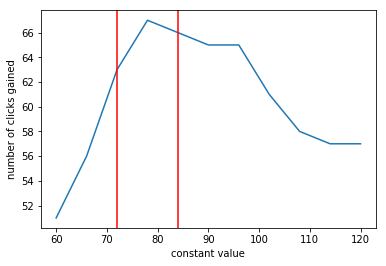

In [54]:
plt.plot(valid_linspace_2, num_clicks_2)
plt.axvline(x=valid_linspace_2[2], color='r')
plt.axvline(x=valid_linspace_2[4], color='r')
plt.xlabel('constant value')
plt.ylabel('number of clicks gained')

Text(0,0.5,'iterated percentation before termination')

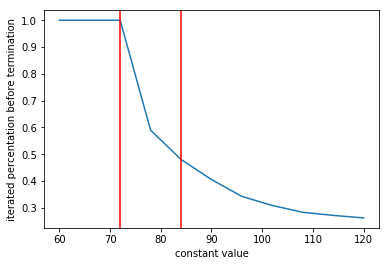

In [55]:
plt.plot(valid_linspace_2, iter_pcts)
plt.axvline(x=valid_linspace_2[2], color='r')
plt.axvline(x=valid_linspace_2[4], color='r')
plt.xlabel('constant value')
plt.ylabel('iterated percentation before termination')

## Third Iteration

In [40]:
valid_linspace_2[2], valid_linspace_2[4]

(72.0, 84.0)

In [60]:
valid_linspace_3 = np.linspace(valid_linspace_2[2], valid_linspace_2[4], 13)

In [61]:
valid_linspace_3

array([72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84.])

In [62]:
num_clicks_3, num_ads_3, iter_pcts_3, budgets_3 = try_consts(valid, valid_linspace_3)

const =  72.0
const =  73.0
const =  74.0
const =  75.0
const =  76.0
const =  77.0
const =  78.0
const =  79.0
const =  80.0
const =  81.0
const =  82.0
const =  83.0
const =  84.0


Text(0,0.5,'number of clicks gained')

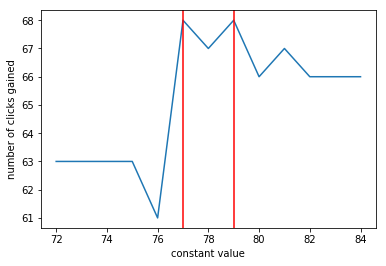

In [85]:
plt.plot(valid_linspace_3, num_clicks_3)
plt.axvline(x=77, color='r')
plt.axvline(x=79, color='r')
plt.xlabel('constant value')
plt.ylabel('number of clicks gained')

## Additional iteration

In [76]:
valid_linspace_2[4], valid_linspace_2[5]

(84.0, 90.0)

In [78]:
valid_linspace_add = np.linspace(valid_linspace_2[4], valid_linspace_2[5], 7)

In [79]:
num_clicks_add, num_ads_add, iter_pcts_add, budgets_add = try_consts(valid, valid_linspace_add)

const =  84.0
const =  85.0
const =  86.0
const =  87.0
const =  88.0
const =  89.0
const =  90.0


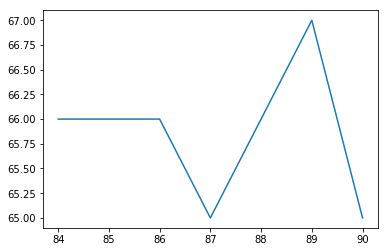

In [81]:
plt.plot(valid_linspace_add, num_clicks_add)

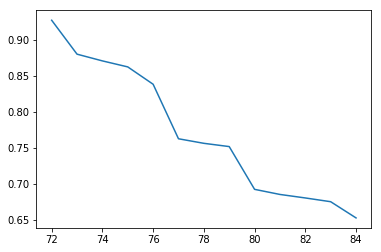

In [66]:
plt.plot(valid_linspace_3, iter_pcts_3)

## Forth Iteration

In [13]:
valid_linspace_4 = np.linspace(77,81,10)

In [14]:
num_clicks_4, num_ads_4, iter_pcts_4, budgets_4 = try_consts(valid, valid_linspace_4)

const =  77.0
const =  77.44444444444444
const =  77.88888888888889
const =  78.33333333333333
const =  78.77777777777777
const =  79.22222222222223
const =  79.66666666666667
const =  80.11111111111111
const =  80.55555555555556
const =  81.0


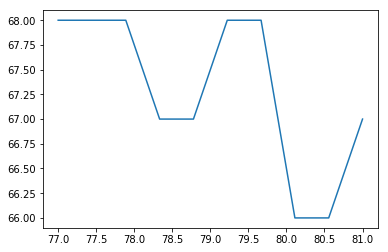

In [15]:
# plt.plot(valid_linspace_4, num_clicks_4)

In [16]:
num_clicks_4

[68, 68, 68, 67, 67, 68, 68, 66, 66, 67]

## Random Bidding

While random bidding strategy could yield different result, we execute it 5 times and take the mean of these results as final result.

Based on the optimal constants found in the previous part, we set our initial bidding interval as [77, 79]

The interval for picking the bid value randomly is selected to be [77, 87). Since every integer value from this interval yields a clicks number which is no less than 66.

In [9]:
from random import uniform

In [32]:
def random_bid(df, low, high):
#     print('low = ', low, 'high = ', high)
    budget = 6250 * 1000
    num_ad = 0
    num_click = 0
    iter_pct = 1.00
    for idx, row in df.iterrows():
        bid_price = uniform(low, high)
        if bid_price >= row.payprice and budget >= bid_price:
            budget -= row.payprice
            num_ad += 1
            num_click += row.click
            
        # early stopping
        if budget < low:
            iter_pct = idx / df.shape[0]
            return num_click, num_ad, iter_pct, budget
        
    return num_click, num_ad, iter_pct, budget

In [37]:
# fix original lower bound, check larger upper bound
# upper_bounds = np.linspace(80, 200, 31)
upper_bounds = np.linspace(80, 200, 31)

num_clicks = []

for high in upper_bounds:
    num_click, _, _, _ = random_bid(valid, 77, high)
    num_clicks.append(num_click)

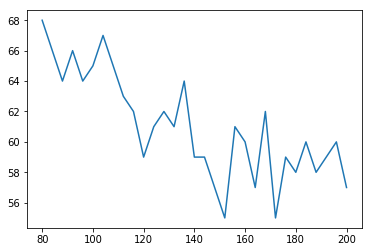

In [42]:
plt.plot(upper_bounds, num_clicks)

In [40]:
# fix original upper bound, check smaller lower bound
lower_bounds = np.linspace(77, 37, 21)

num_clicks_lower = []

for low in lower_bounds:
    num_click, _, _, _ = random_bid(valid, low=low, high=79)
    num_clicks_lower.append(num_click)

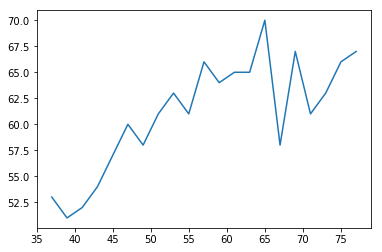

In [43]:
plt.plot(lower_bounds, num_clicks_lower)

In [45]:
# expand the interval for both directions:
low = 77
high = 79
num_clicks_expd = []
for x in range(10):
    low -= 2
    high += 2
    num_click, _, _, _ = random_bid(valid, low=low, high=high)
    num_clicks_expd.append(num_click)

In [46]:
num_clicks_expd

[68, 62, 64, 69, 68, 65, 64, 67, 62, 65]

In [16]:
np.sum(train.payprice < 77) / train.shape[0]

0.6023490105434802

In [13]:
num_click

67

In [130]:
iter_pct

0.6903282059718681

In [86]:
rand_inteval = [77, 86]

In [26]:
# plt.plot(num_ads)

## *First Iteration on training data

In [80]:
np.linspace(0,300,11)

array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.])

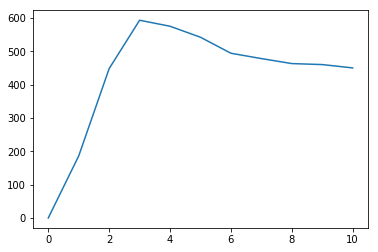

In [70]:
plt.plot(num_clicks)

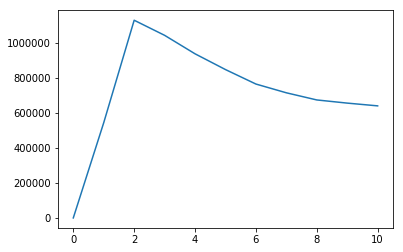

In [71]:
plt.plot(num_ads)

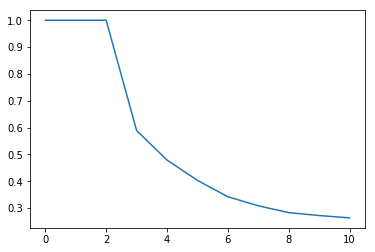

In [72]:
plt.plot(iter_pcts)

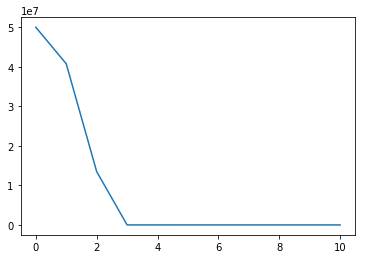

In [74]:
plt.plot(budgets)

## Validation

In [12]:
vald = pd.read_csv('./data/validation.csv')

In [63]:
vald.shape

(303925, 25)

In [64]:
test = pd.read_csv('./data/test.csv')

In [65]:
test.shape

(303375, 22)

In [13]:
vald.iloc[0]

click                                                    0
weekday                                                  4
hour                                                    20
bidid             bbcb813b6166538503d8b33a5602d7d72f6019dc
userid            663169f66491c98c69f1f94a5c48fa34aa9fe06f
useragent                                       windows_ie
IP                                           211.144.203.*
region                                                  79
city                                                    79
adexchange                                               1
domain                                      trqRTvFRLpscFU
url                       5ede68cc7542a34777fb8a1574856b6f
urlid                                                 null
slotid                         mm_10027070_2459574_9659312
slotwidth                                              160
slotheight                                             600
slotvisibility                                          

- 

- how to evaluate